# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Введение 


**Описание проекта**  
    
    В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


**Цель проекта**  

    Определить рыночную стоимость объектов недвижимости и установить параметры, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности. 

**Описание данных**  

    •	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
    •	balcony — число балконов  
    •	ceiling_height — высота потолков (м)  
    •	cityCenters_nearest — расстояние до центра города (м)  
    •	days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
    •	first_day_exposition — дата публикации  
    •	floor — этаж  
    •	floors_total — всего этажей в доме  
    •	is_apartment — апартаменты (булев тип)  
    •	kitchen_area — площадь кухни в квадратных метрах (м²)  
    •	last_price — цена на момент снятия с публикации  
    •	living_area — жилая площадь в квадратных метрах (м²)  
    •	locality_name — название населённого пункта  
    •	open_plan — свободная планировка (булев тип)  
    •	parks_around3000 — число парков в радиусе 3 км  
    •	parks_nearest — расстояние до ближайшего парка (м)  
    •	ponds_around3000 — число водоёмов в радиусе 3 км  
    •	ponds_nearest — расстояние до ближайшего водоёма (м)  
    •	rooms — число комнат  
    •	studio — квартира-студия (булев тип)  
    •	total_area — общая площадь квартиры в квадратных метрах (м²)  
    •	total_images — число фотографий квартиры в объявлении  


**План работы**  

    Шаг 1. Открыть таблицу и изучить общую информацию о данных.  
    Шаг 2. Предобработка данных.  
    Шаг 3. Исследовать данные и ответить на вопросы.  
    Шаг 4: Общий вывод.  


### Откройте файл с данными и изучите общую информацию. 

#### Загрузка данных из файла в датафрейм.  

Импорт библиотеки pandas для считывания данных из csv-файла в датафрейм и сохранение в переменную data.  
Путь к файлу: /datasets/real_estate_data.csv

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Вывод первых 10 строчек датафрейма data на экран.

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Вывод основной информацию о датафрейме с помощью метода info().

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

####	Построение общей гистограммы для всех числовых столбцов таблицы.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

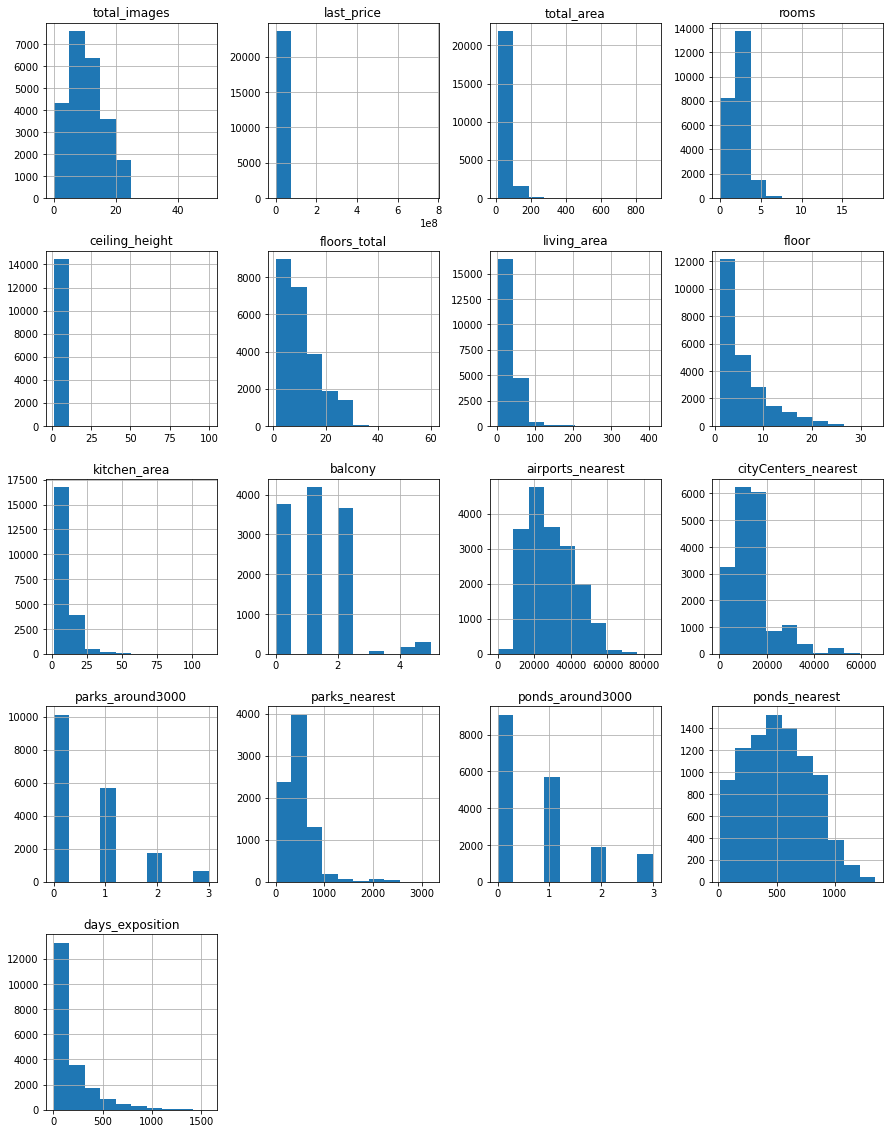

In [4]:
data.hist(figsize=(15, 20))

### Предобработка данных

1.	Найдите и изучите пропущенные значения в столбцах:  
- Определите, в каких столбцах есть пропуски.  
- Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.  
- В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.
2.	Рассмотрите типы данных в каждом столбце:  
- Найдите столбцы, в которых нужно изменить тип данных.  
- Преобразуйте тип данных в выбранных столбцах.  
- В ячейке с типом markdown поясните, почему нужно изменить тип данных.  
3.	Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.  


4.	Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.  
- Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
- В противном случае удалите редкие и выбивающиеся значения.
- В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.


#### Обработка пропущенных значений для каждого столбца.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах есть пропущенные значения.

In [6]:
# Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.
data['balcony'] = data['balcony'].fillna(0)
# Проверяем произошла ли замена.
print(data['balcony'].isna().sum())

0


In [7]:
# Бывает, что высоту потолков продавцы забывают указать, поэтому заменим их медианным значением.
ceiling_height_avg = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_avg)
# Проверяем произошла ли замена.
print(data['ceiling_height'].isna().sum())

0


In [8]:
# Число этажей в доме заменим медианным значением.
floors_total_avg = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(floors_total_avg)
print(data['floors_total'].isna().sum())

0


In [9]:
# Жилую площадь в квадратных метрах также можно заменить медианным значением
living_area_avg = data['living_area'].median()
data['living_area'] = data['living_area'].fillna(living_area_avg)
print(data['living_area'].isna().sum())

0


In [10]:
# апартаменты (булев тип) заменим на пустую строку
data['is_apartment'] = data['is_apartment'].fillna(value='') 
print(data['is_apartment'].isna().sum())

0


In [11]:
# площадь кухни в квадратных метрах также можно заменить медианным значением
kitchen_area_avg = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_avg)
print(data['kitchen_area'].isna().sum())

0


In [12]:
# название населённого пункта заменим на пустую строку
data['locality_name'] = data['locality_name'].fillna(value='') 
print(data['locality_name'].isna().sum())

0


In [13]:
# расстояние до ближайшего аэропорта в метрах заменим медианным значением
airports_nearest_avg = data['airports_nearest'].median()
data['airports_nearest'] = data['airports_nearest'].fillna(airports_nearest_avg)
print(data['airports_nearest'].isna().sum())

0


In [14]:
# расстояние до центра города заменим медианным значением
cityCenters_nearest_avg = data['cityCenters_nearest'].median()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(cityCenters_nearest_avg)
print(data['cityCenters_nearest'].isna().sum())

0


In [15]:
# число парков в радиусе 3 км заменим медианным значением
parks_around3000_avg = data['parks_around3000'].median()
data['parks_around3000'] = data['parks_around3000'].fillna(parks_around3000_avg)
print(data['parks_around3000'].isna().sum())

0


In [16]:
# расстояние до ближайшего парка заменим медианным значением
parks_nearest_avg = data['parks_nearest'].median()
data['parks_nearest'] = data['parks_nearest'].fillna(parks_nearest_avg)
print(data['parks_nearest'].isna().sum())

0


In [17]:
# число водоёмов в радиусе 3 км заменим медианным значением
ponds_around3000_avg = data['ponds_around3000'].median()
data['ponds_around3000'] = data['ponds_around3000'].fillna(ponds_around3000_avg)
print(data['ponds_around3000'].isna().sum())

0


In [18]:
# расстояние до ближайшего водоёма заменим медианным значением
ponds_nearest_avg = data['ponds_nearest'].median()
data['ponds_nearest'] = data['ponds_nearest'].fillna(ponds_nearest_avg)
print(data['ponds_nearest'].isna().sum())

0


In [19]:
# сколько дней было размещено объявление (от публикации до снятия) заменим медианным значением
days_exposition_avg = data['days_exposition'].median()
data['days_exposition'] = data['days_exposition'].fillna(days_exposition_avg)
print(data['days_exposition'].isna().sum())

0


In [20]:
year = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.to_period("Y")

days_exposition_years = data.pivot_table(index=year, values='days_exposition')
days_exposition_years.isna().sum()

days_exposition    0
dtype: int64

In [21]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Возможные причины пропуска данных: ошибки ввода данных, намеренное сокрытие информации самим клиентом, технический сбой.

#### Обработка типов данных в каждом столбце.


    Найдите столбцы, в которых нужно изменить тип данных.
    Преобразуйте тип данных в выбранных столбцах.
    В ячейке с типом markdown поясните, почему нужно изменить тип данных.


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [23]:
# object в first_day_exposition заменим на datetime64

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [24]:
data['floors_total'].astype('int')

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: int64

In [25]:
data['balcony'].astype('int')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

In [26]:
data['parks_around3000'].astype('int')

0        1
1        0
2        1
3        2
4        2
        ..
23694    1
23695    0
23696    0
23697    2
23698    0
Name: parks_around3000, Length: 23699, dtype: int64

In [27]:
data['ponds_around3000'].astype('int')

0        2
1        0
2        2
3        3
4        1
        ..
23694    3
23695    1
23696    1
23697    3
23698    1
Name: ponds_around3000, Length: 23699, dtype: int64

In [28]:
# проверим тип данных после замены
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Выгружая значения дат из баз данных, можно столкнуться с форматом вида 2019-08-03Z17:25:00 или 03, Aug 19, 5:25 PM — такого Pandas уже не разберёт.
Вне зависимости от способа записи, дату и время нужно вводить в арифметические операции. Для этого и нужно изменить тип данных со строчного на datetime.  
Этажей в доме может быть только целое число, поэтому нужно поменять тип данных из вещественного в целочисленный.

#### Обработка дубликатов

Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [29]:
# количество дубликатов в столбце с названиями населенных пунктов (подсчёт явных дубликатов)
data['locality_name'].duplicated().sum()

23334

In [30]:
# приведем все к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

# Все "ё" в датасете заменим на "е".
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [31]:
# вывод каждого уникальноого значения и подсчет частоты его встречаемости в столбце
data['locality_name'].value_counts()

санкт-петербург                      15721
поселок мурино                         556
поселок шушары                         440
всеволожск                             398
пушкин                                 369
                                     ...  
деревня большой сабск                    1
деревня щеглово                          1
деревня ялгино                           1
поселок левашово                         1
садовое товарищество приладожский        1
Name: locality_name, Length: 331, dtype: int64

In [32]:
# количество строк-дубликатов
data['locality_name'].duplicated().count()

23699

In [33]:
# Проверка на неявные дубликаты
print(data['locality_name'].sort_values().unique())

['' 'бокситогорск' 'волосово' 'волхов' 'всеволожск' 'выборг' 'высоцк'
 'гатчина' 'городской поселок большая ижора' 'городской поселок будогощь'
 'городской поселок виллози' 'городской поселок лесогорский'
 'городской поселок мга' 'городской поселок назия'
 'городской поселок новоселье' 'городской поселок павлово'
 'городской поселок рощино' 'городской поселок свирьстрой'
 'городской поселок советский' 'городской поселок федоровское'
 'городской поселок янино-1' 'деревня агалатово' 'деревня аро'
 'деревня батово' 'деревня бегуницы' 'деревня белогорка'
 'деревня большая вруда' 'деревня большая пустомержа'
 'деревня большие колпаны' 'деревня большое рейзино'
 'деревня большой сабск' 'деревня бор' 'деревня борисова грива'
 'деревня ваганово' 'деревня вартемяги' 'деревня вахнова кара'
 'деревня выскатка' 'деревня гарболово' 'деревня глинка'
 'деревня горбунки' 'деревня гостилицы' 'деревня заклинье'
 'деревня заневка' 'деревня зимитицы' 'деревня извара' 'деревня иссад'
 'деревня калитино' 'д

In [34]:
# сохранение в переменной settlements_list списка уникальных значений
settlements_list=data['locality_name'].unique()

# функция принимает как параметр строку с названием искомого посёлка
def find_settlements(settlement):
    duplicates = []
    for i in settlements_list:
        if settlement in i:
            duplicates.append(i)
    return duplicates

In [35]:
# Вызов функции find_settlements() для поиска неявных дубликатов названий посёлков в таблице.
find_settlements('рябово')

['поселок рябово', 'поселок городского типа рябово']

In [36]:
# замена неявных дубликатов на однообразное написание
data['locality_name'] = data['locality_name'].replace('посёлок|деревня|село|поселок|посёлок городского типа|поселок городского типа|городского типа|садовое товарищество', '', regex=True)

In [37]:
# Почему-то не изменилось значение, поэтому дальше не стал делать. Подскажи пожалуйста в чем ошибка. Спасибо!
find_settlements('рябово')

['поселок рябово', 'поселок городского типа рябово']

In [38]:
# Проверка на неявные дубликаты
print(data['locality_name'].sort_values().unique())

['' '  большая ижора' '  важины' '  вознесенье' '  вырица'
 '  дружная горка' '  дубровка' '  ефимовский' '  имени морозова'
 '  имени свердлова' '  кондратьево' '  красный бор' '  кузнечное'
 '  кузьмоловский' '  лебяжье' '  лесогорский' '  мга' '  назия'
 '  никольский' '  павлово' '  приладожский' '  рахья' '  рощино'
 '  рябово' '  сиверский' '  синявино' '  советский' '  тайцы' '  токсово'
 '  ульяновка' '  форносово' ' агалатово' ' александровская' ' алексеевка'
 ' аннино' ' аро' ' барышево' ' батово' ' бегуницы' ' белогорка'
 ' белоостров' ' большая вруда' ' большая пустомержа' ' большие колпаны'
 ' большое рейзино' ' большой сабск' ' бор' ' борисова грива' ' бугры'
 ' ваганово' ' вартемяги' ' вахнова кара' ' возрождение' ' войсковицы'
 ' войскорово' ' володарское' ' выскатка' ' высокоключевой' ' гаврилово'
 ' гарболово' ' гладкое' ' глажево' ' глебычево' ' глинка' ' гончарово'
 ' горбунки' ' гостилицы' ' громово' ' дзержинского' ' дружноселье'
 ' елизаветино' ' жил' ' жилгородо

In [39]:
find_settlements('большая ижора')

['городской поселок большая ижора', 'поселок городского типа большая ижора']

In [40]:
find_settlements('мурино')

['поселок мурино', 'мурино']

In [41]:
find_settlements('кудрово')

['деревня кудрово', 'кудрово']

In [42]:
find_settlements('кингисепп')

['кингисепп', 'поселок кингисеппский']

In [43]:
find_settlements('никольское')

['никольское', 'село никольское']

In [44]:
find_settlements('коммунар')

['коммунар', 'поселок коммунары']

In [45]:
# непонятно это один и тот же посёлок или разные - на карте посмотрел, очень близко расположены (7 км), поэтому пока оставлю 
#без изменений
find_settlements('романовка')

['поселок романовка', 'деревня малая романовка']

In [46]:
find_settlements('рощино')

['поселок городского типа рощино', 'городской поселок рощино']

In [47]:
find_settlements('мга')

['городской поселок мга', 'поселок городского типа мга']

In [48]:
# также непонятно - на карте посмотрел, очень близко расположены (4 км), поэтому пока оставлю без изменений
find_settlements('щеглово')

['поселок щеглово', 'деревня щеглово']

In [49]:
# оставлю без изменений
find_settlements('колпаны')

['деревня большие колпаны', 'деревня малые колпаны']

In [50]:
# также непонятно - на карте посмотрел, очень близко расположены (2.3 км), поэтому пока оставлю без изменений
find_settlements('бегуницы')

['деревня бегуницы', 'деревня старые бегуницы']

In [51]:
find_settlements('рахья')

['поселок городского типа рахья', 'садовое товарищество рахья']

In [52]:
find_settlements('назия')

['городской поселок назия', 'поселок городского типа назия']

In [53]:
find_settlements('гарболово')

['деревня гарболово', 'поселок гарболово']

In [54]:
find_settlements('приладожский')

['поселок городского типа приладожский', 'садовое товарищество приладожский']

In [55]:
find_settlements('павлово')

['село павлово',
 'городской поселок павлово',
 'поселок городского типа павлово']

In [56]:
find_settlements('советский')

['поселок городского типа советский', 'городской поселок советский']

In [57]:
find_settlements('федоровское')

['деревня федоровское', 'городской поселок федоровское']

In [58]:
find_settlements('любань')

['любань', 'поселок любань']

In [59]:
# также непонятно - на карте посмотрел, очень близко расположены (1.6 км), поэтому пока оставлю без изменений
find_settlements('калитино')

['деревня калитино', 'поселок калитино']

In [60]:
data['locality_name'].duplicated().sum()

23373

#### Обработка аномалий  

    Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. 
    Попробуйте обработать аномалии в этом и других столбцах.

    Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
    В противном случае удалите редкие и выбивающиеся значения.
    В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.


In [61]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.667750,34.099892,5.892358,10.428526,0.591080,28310.148023,13936.792797,0.469049,467.205789,0.823748,508.143128,169.360226
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.585961,21.162096,4.885249,5.631126,0.959298,11090.330161,7553.779633,0.748534,200.579309,0.827588,172.357382,206.535633
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.400000,0.000000,21183.000000,10927.000000,0.000000,455.000000,0.000000,502.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,455.000000,1.000000,502.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [62]:
rows = data['ceiling_height'] > 8.3
data.loc[rows, 'ceiling_height'] /= 10

In [63]:
data.loc[data['days_exposition'] > 365, 'days_exposition'] /= 10

Помимо столбца ceiling_height, где были указаны высота потолков 25 м и 32 м, что на самом деле являлось вещественным значением: 2.5 м и 3.2 м, в столбце days_exposition было очень много значений больше 365 дней, что не похоже на правду и я разделил их на 10.

In [64]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.697798,10.667750,34.099892,5.892358,10.428526,0.591080,28310.148023,13936.792797,0.469049,467.205789,0.823748,508.143128,97.859766
std,5.682529,1.088701e+07,35.654083,1.078405,0.237643,6.585961,21.162096,4.885249,5.631126,0.959298,11090.330161,7553.779633,0.748534,200.579309,0.827588,172.357382,78.609221
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.400000,0.000000,21183.000000,10927.000000,0.000000,455.000000,0.000000,502.000000,44.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,83.800000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,455.000000,1.000000,502.000000,119.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,364.000000


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

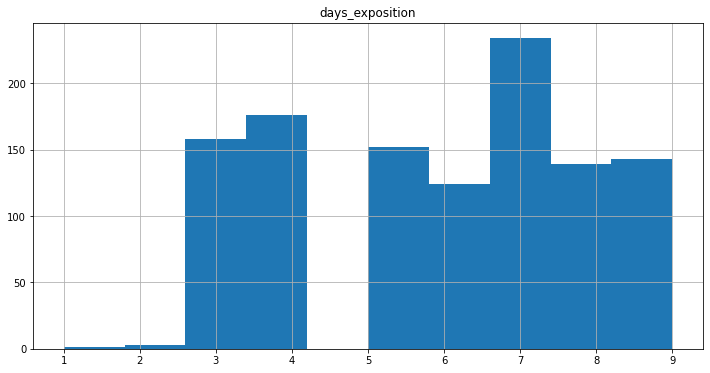

In [65]:
# построим гистограмму чтобы наглядно увидеть аномалии (выбросы)
data.loc[data['days_exposition'] < 10].hist('days_exposition', figsize=(12, 6), bins=10)

In [66]:
# Из метода describe() и гистограммы видно, что значение менее 3-х дней является аномалией, поэтому их можно удалить.
data = data[data['days_exposition'] > 3]

In [67]:
# Из метода describe() видно, что значения потолка менее 2 является аномалией, поэтому их можно удалить.
data = data[data['ceiling_height'] > 2]

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

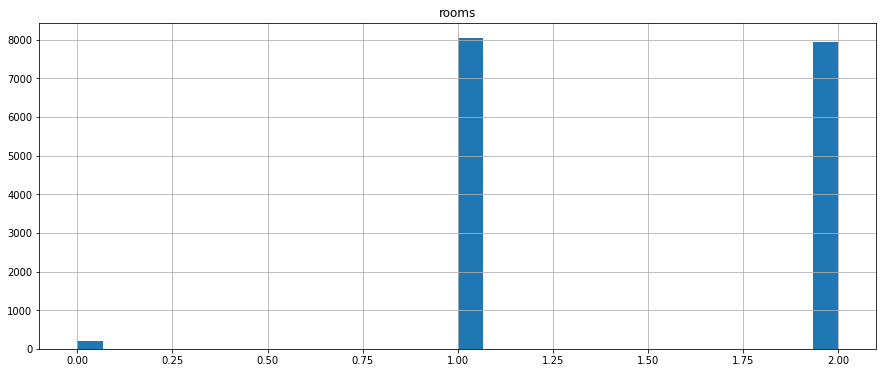

In [68]:
# построим гистограмму чтобы наглядно увидеть аномалии (выбросы)
data.hist('rooms', figsize=(15, 6), range=(0, 2),  bins=30)

In [69]:
# Из гистограммы столбца видно, что значения меньше 0.8 являются аномалией, поэтому их можно удалить.
data = data[data['rooms'] > 0.8]

In [70]:
# Из метода describe() видно, что значения меньше 20 является аномалией, поэтому их можно удалить.
data = data[data['total_area'] > 20]

In [71]:
# Из метода describe() столбца видно, что значения меньше 10 является аномалией, поэтому их можно удалить.
data = data[data['living_area'] > 10]

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

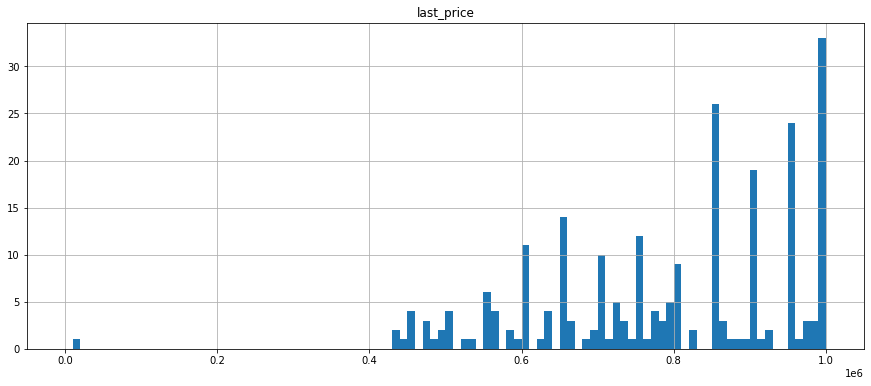

In [72]:
# построим гистограмму чтобы наглядно увидеть аномалии (выбросы)
data.hist('last_price', figsize=(15, 6), range=(0, 1000000), bins=100)

In [73]:
# Из гистограммы столбца видно, что значения меньше 400.000 является аномалией, поэтому их можно удалить.
data = data[data['last_price'] > 400000]

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

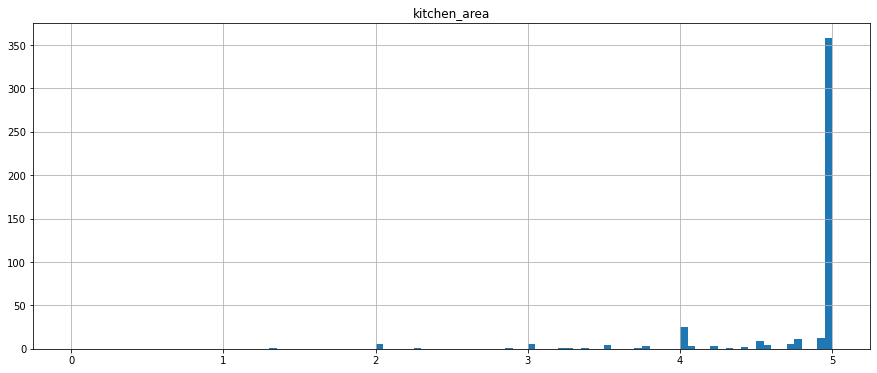

In [74]:
# построим гистограмму чтобы наглядно увидеть аномалии (выбросы)
data.hist('kitchen_area', figsize=(15, 6), range=(0, 5), bins=100)

In [75]:
# Из гистограммы столбца видно, что значения меньше 5 является аномалией, поэтому их можно удалить.
data = data[(data['kitchen_area'] > 5)]

In [76]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22946.000000,2.294600e+04,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000
mean,9.904689,6.642311e+06,61.084212,2.094265,2.700006,10.706703,34.425158,5.912752,10.545477,0.591388,28361.287675,13876.257125,0.472196,467.416412,0.821886,507.807330,98.015946
std,5.696885,1.102826e+07,35.819453,1.069498,0.237512,6.558399,21.337690,4.880714,5.644365,0.963144,11079.437839,7477.288550,0.750064,202.345586,0.830216,172.213285,78.636693
min,0.000000,4.300000e+05,20.100000,1.000000,2.250000,1.000000,10.080000,1.000000,5.040000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,3.000000
25%,6.000000,3.500000e+06,40.500000,1.000000,2.600000,5.000000,19.400000,2.000000,7.500000,0.000000,21227.000000,10889.000000,0.000000,455.000000,0.000000,502.000000,44.200000
50%,10.000000,4.700000e+06,53.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,84.000000
75%,14.000000,6.890000e+06,70.000000,3.000000,2.700000,16.000000,41.800000,8.000000,11.600000,1.000000,34494.750000,15232.750000,1.000000,455.000000,1.000000,502.000000,120.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,364.000000


#### Вывод

На этапе предобработки данных были обнаружены пропуски в данных, возможными причинами которых могут быть: ошибки ввода данных, намеренное сокрытие информации самим клиентом, технический сбой.  
Также в данных были обнаружены следующие особенности:  

    • В столбце количества дней размещения объявлений был довольно высокий разброс – минимальное значение 1 день, а максимальное 1580 дней, что видится нереалистичным, поэтому было принято решение удалить значения выше 365 дней, т.е. больше 1 года. В среднем объявления (от публикации до снятия) после удаления значений выше 365 были размещены 98 дней, что является довольно реалистичным показателем.  
    • Значения потолка менее 2 и более 8.3 были обнаружены в данных, что является аномалией, поэтому они были удалены. Среднее значение после обработки данных – 2.7 м.  
    • В данных были обнаружены нулевые значения в количестве комнат, что является аномалией, поэтому они были удалены. Средний показатель — это двухкомнатные квартиры.  
    • Значения общей площади объектов меньше 20 является также были похожи на выброс, поэтому они также были удалены. Среднее значение после обработки данных – 61 м2.  
    • Стоимость объектов со значением в 12.190, которые также присутствовали в данных, является аномалией, поэтому они были удалены. Средняя стоимость объектов после удаления – 6.642.311.  
    • В данных были значения площади кухни меньше 4, что нереалистично, они также были удалены. Среднее значение после обработки данных – 10 м2, что похоже на правду.  
  

Рекомендации заказчику: при сборе данных обратить внимание на несбалансированность данных в категориях и увеличить выборку количества объектов в тех, где есть выбросы.

### Посчитайте и добавьте в таблицу новые столбцы со следующими параметрами:

•	цена одного квадратного метра;  
•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
•	месяц публикации объявления;  
•	год публикации объявления;  
•	тип этажа квартиры (значения — «‎первый», «последний», «другой»);  
•	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [77]:
# цена одного квадратного метра;
data['price_per_one_square_meter'] = data['last_price'] / data['total_area']
data['price_per_one_square_meter']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_per_one_square_meter, Length: 22946, dtype: float64

In [78]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

data['announcement_weekday'] = data['first_day_exposition'].dt.weekday

In [79]:
# месяц публикации объявления;

data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: publication_month, Length: 22946, dtype: int64

In [80]:
# год публикации объявления;

data['publication_year'] = data['first_day_exposition'].dt.to_period("Y")
data['publication_year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: publication_year, Length: 22946, dtype: period[A-DEC]

In [81]:
# тип этажа квартиры (значения — «первый», «последний», «другой»);
def apartment_floor_type(floor):
    if floor == 1:
        return 'первый'
    if floor == 33:
        return 'последний'
    return 'другой'

data['apartment_floor_type'] = data['floor'].apply(apartment_floor_type)

In [82]:
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

data['distance_to_city_center'] = (data['cityCenters_nearest'] / 1000).round()
data['distance_to_city_center']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695    13.0
23696    13.0
23697    10.0
23698    13.0
Name: distance_to_city_center, Length: 22946, dtype: float64

### Проведите исследовательский анализ данных

1.	Изучите следующие параметры объектов:  
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.  

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.  

2.	Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.  
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?  

3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта?  

Изучите, зависит ли цена от:  
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).  

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.  

4.	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.  


5.	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

#### Изучение параметров объектов и построение отдельных гистограмм для каждого из этих параметров.  

    общая площадь;
    жилая площадь;
    площадь кухни;
    цена объекта;
    количество комнат;
    высота потолков;
    этаж квартиры;
    тип этажа квартиры («первый», «последний», «другой»);
    общее количество этажей в доме;
    расстояние до центра города в метрах;
    расстояние до ближайшего аэропорта;
    расстояние до ближайшего парка;
    день и месяц публикации объявления.

<AxesSubplot:>

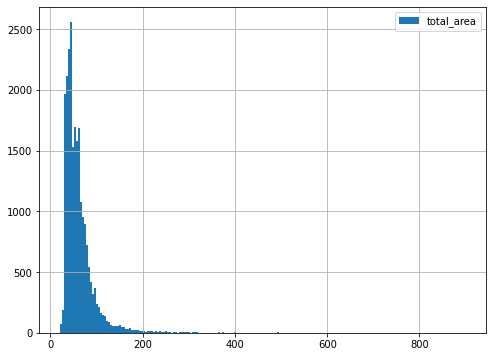

In [83]:
# общая площадь;
data['total_area'].hist(bins=200, figsize=(8, 6), legend=True)

<AxesSubplot:>

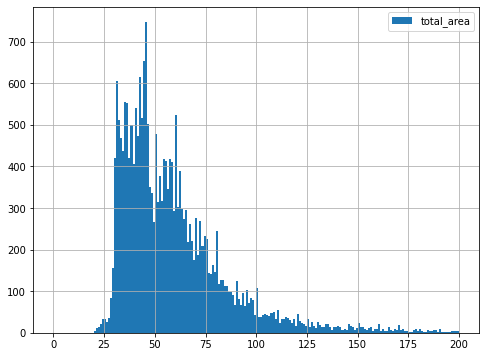

In [84]:
data['total_area'].hist(bins= 200, range=(0, 200), figsize=(8, 6), legend=True)

Из гистограммы видно, что значения выше 200 слишком похоже на выброс, т.е сильно отличается от других элементов в наборе данных. Изменив масштаб вручную и указав диапазон значений от 0 до 200, можно увидеть что наиболее часто встречающееся значение общей площади среди квартир - 45 м², затем идут квартиры общей площадью от 30 до 40 м² и от 60 до 80 м². Квартир площадью более 130  м² наименее всего.

<AxesSubplot:>

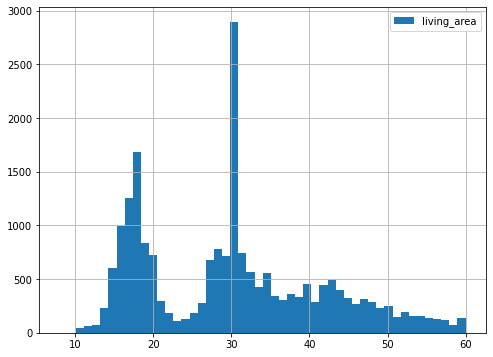

In [85]:
# жилая площадь;
data['living_area'].hist(bins=50, range=(8, 60), figsize=(8, 6), legend=True)

Из гистограммы видно, что максимальное количество квартир с жилой площадью 30 м², а на втором месте 18 м² и чаще всего встречаются площади 12-20 м² и 28-42 м².

<AxesSubplot:>

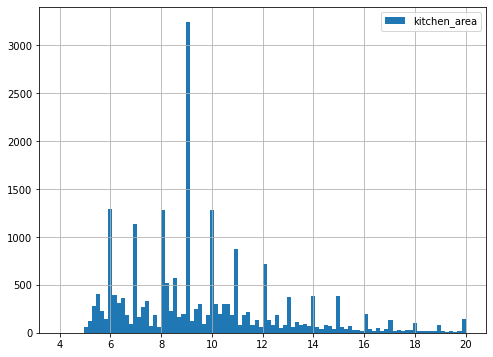

In [86]:
# площадь кухни;
data['kitchen_area'].hist(bins=100, range=(4, 20), figsize=(8, 6), legend=True)

Из гистограммы видно, что максимальное количество квартир с площадью кухни 9.1 м², а на втором месте 6 м² и чаще всего встречаются площади 6-12 м².

<AxesSubplot:>

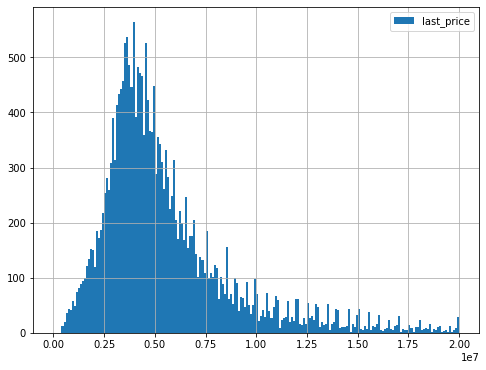

In [87]:
# цена объекта;
data['last_price'].hist(bins=200, range=(0, 20000000), figsize=(8, 6), legend=True)

Из гистограммы видно, что максимальное количество обьектов с ценой в 4.5 млн., а чаще всего встречаются цены в диапазоне 2.5-6 млн.

<AxesSubplot:>

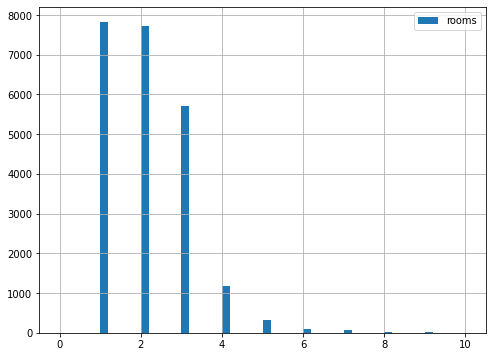

In [88]:
# количество комнат;
data['rooms'].hist(bins=50, range=(0, 10), figsize=(8, 6), legend=True)

Из гистограммы видно, что больше всего одна- и двух-комнатных квартир. Это самые популярные сегменты. На втором месте трех-комнатные квартиры, а вот 4-х и более комнатные встречаются крайне редко.

<AxesSubplot:>

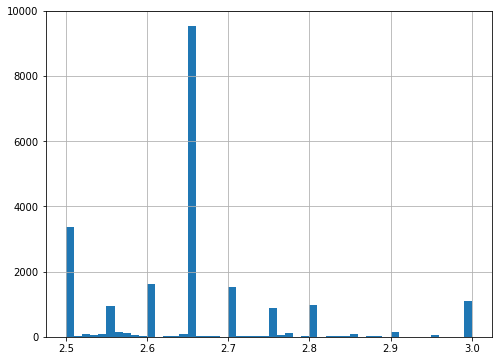

In [89]:
# высота потолков;
data['ceiling_height'].hist(bins=50, range=(2.5, 3), figsize=(8, 6))

Из гистограммы видно, что чаще всего встречаются потолки, высотой в 2.65 м.

<AxesSubplot:>

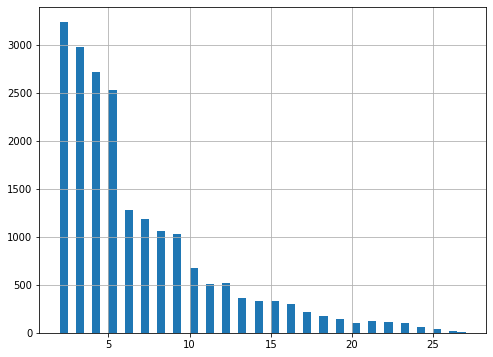

In [90]:
# этаж квартиры;
data['floor'].hist(bins=50, range=(2, 27), figsize=(8, 6))

Из гистограммы видно, что чаще всего встречаются этажи от 2 до 5, затем от 6 до 10, а более высокие дома встречаются редко.

<AxesSubplot:>

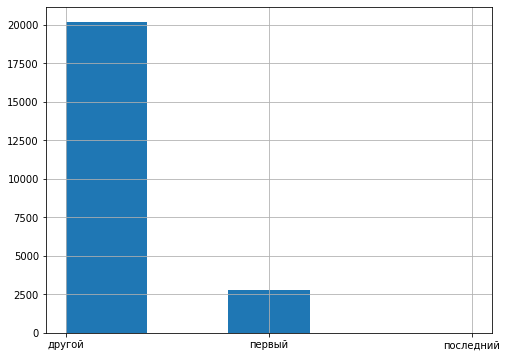

In [91]:
# тип этажа квартиры («первый», «последний», «другой»);
data['apartment_floor_type'].hist(bins=5, figsize=(8, 6))

Из гистограммы видно, что чаще всего встречаются этажи между первым и последним, иногда встречаются первые этажи, а вот последних этажей практически нет, что немного странновато.

<AxesSubplot:>

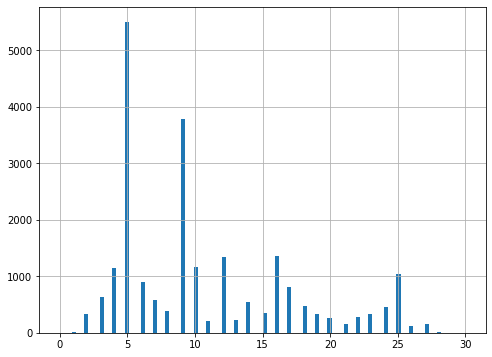

In [92]:
# общее количество этажей в доме;
data['floors_total'].hist(bins=100, range=(0, 30), figsize=(8, 6))

Чаще всего встречаются пятиэтажные и девятиэтажные дома, а остальные не так часто, особенно выше 25 этажей в домах практически не встретить.

<AxesSubplot:>

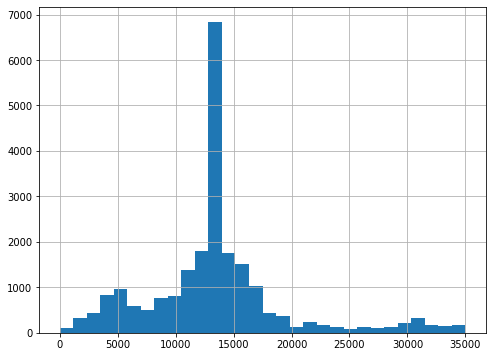

In [93]:
# расстояние до центра города в метрах;
data['cityCenters_nearest'].hist(bins=30, range=(0, 35000), figsize=(8, 6))

Чаще всего расстояние до центра города составляет 13100 м и в диапазоне 11000-16000 м.

<AxesSubplot:>

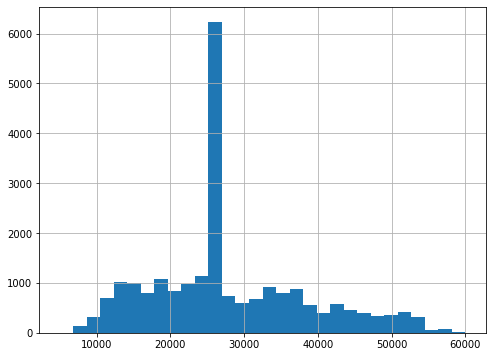

In [94]:
# расстояние до ближайшего аэропорта;
data['airports_nearest'].hist(bins=30, range=(5000, 60000), figsize=(8, 6))

Чаще всего расстояние до ближайшего аэропорта составляет 26726 м и в диапазоне 11000-38000 м.

<AxesSubplot:>

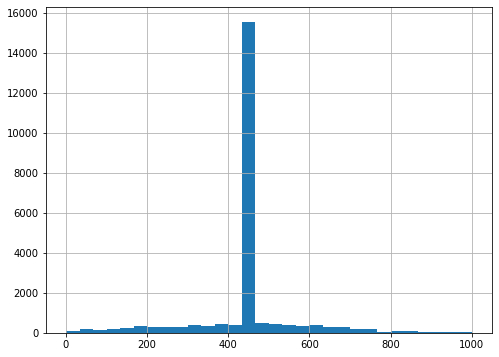

In [95]:
# расстояние до ближайшего парка;
data['parks_nearest'].hist(bins=30, range=(0, 1000), figsize=(8, 6))

Чаще всего расстояние до ближайшего парка составляет 455 м и в диапазоне 200-600 м.

<AxesSubplot:>

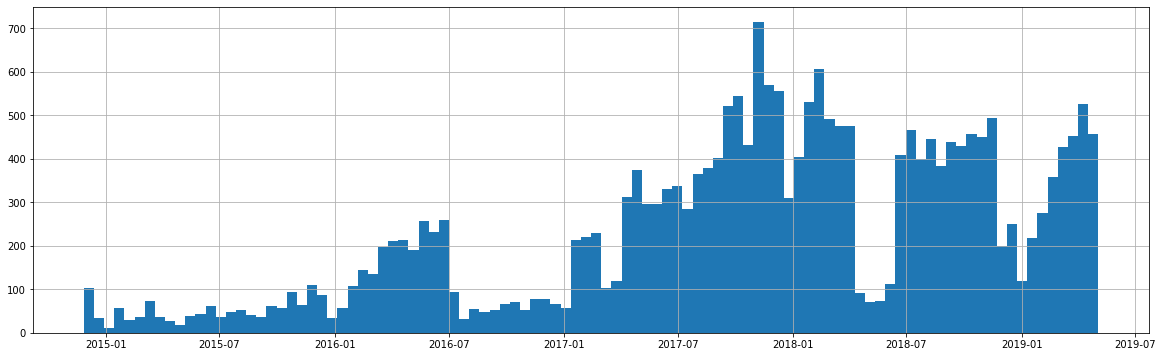

In [96]:
# день и месяц публикации объявления.
data['first_day_exposition'].hist(bins=100, range=('2014-11-27 00:00:00', '2019-05-03 00:00:00'), figsize=(20, 6))

Чаще всего публикации были 2017-11-10 и в диапазоне от 2017-08-01 до 2018-04-01.

<AxesSubplot:>

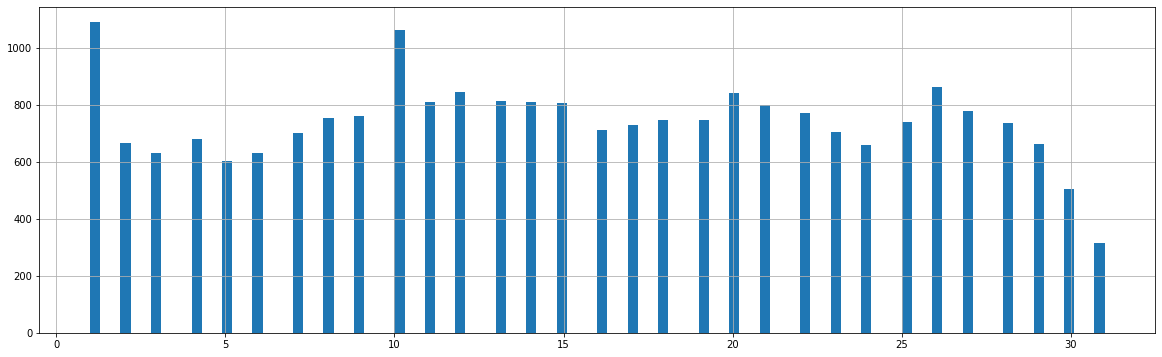

In [97]:
# день публикации объявления.
day = data['first_day_exposition'].dt.day
day.hist(bins=100, figsize=(20, 6))

Чаще всего публикации были на 1 и 10 днях.

<AxesSubplot:>

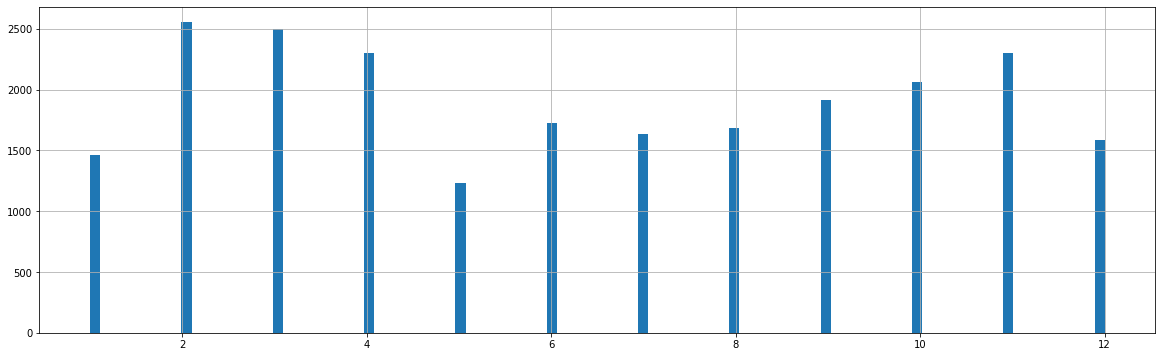

In [98]:
# месяц публикации объявления.
month = data['first_day_exposition'].dt.month
month.hist(bins=100, figsize=(20, 6))

Чаще всего публикации были на 2-4 и 10-11 месяцах.

#### Как быстро продавались квартиры
    
   Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
   Постройте гистограмму.  
   Посчитайте среднее и медиану.  
   В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

<AxesSubplot:>

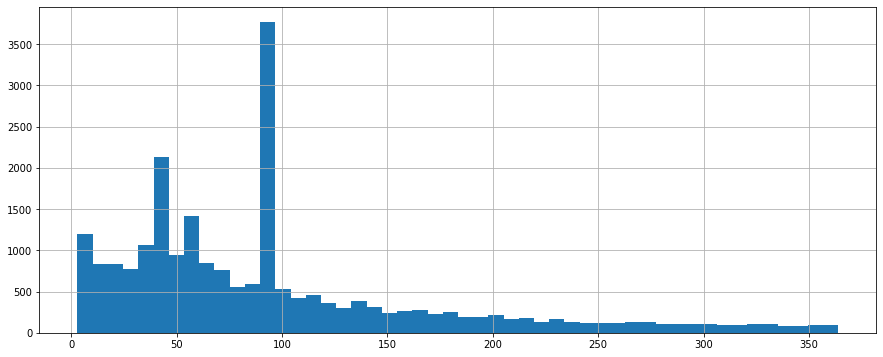

In [99]:
data['days_exposition'].hist(bins=50, figsize=(15, 6))

In [100]:
data['days_exposition'].mean()

98.01594613440253

In [101]:
data['days_exposition'].median()

84.0

Чаще всего публикации висели 95 дней, в среднем продажа занимала 98 дней. Продажи, которые происходили менее чем за 84 дня после публикации можно считать быстрыми, а те, которые висели более 150 дней — необычно долгими.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучите, зависит ли цена от:

    общей площади;
    жилой площади;
    площади кухни;
    количества комнат;
    этажа, на котором расположена квартира (первый, последний, другой);
    даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы. 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

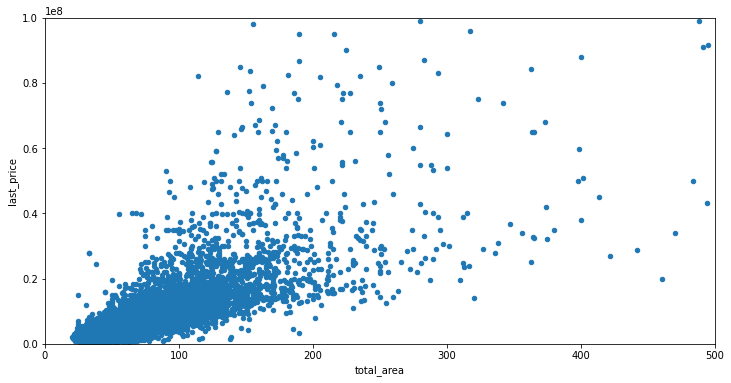

In [102]:
# зависимость цены от общей площади
data.sort_values('last_price').plot(x='total_area', y='last_price', kind='scatter', xlim=(0, 500), ylim=(0, 100000000), 
                                    figsize=(12,6))

Из графика рассеивания видно, что с увеличением общей площади квартир, увеличивается и цена.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

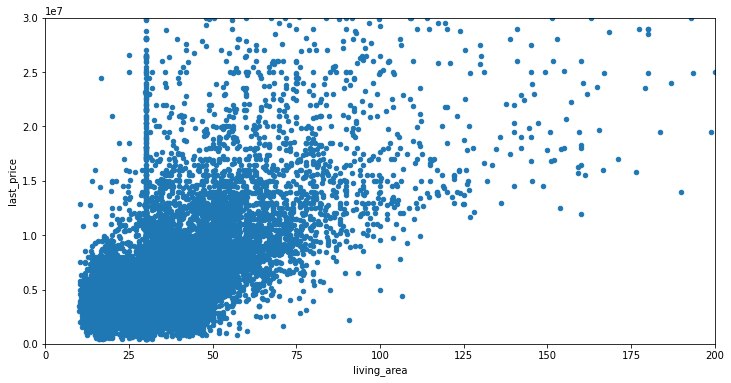

In [103]:
# зависимость цены от жилой площади
data.sort_values('last_price').plot(x='living_area', y='last_price', kind='scatter', figsize=(12,6), 
                                   xlim=(0, 200), ylim=(0, 30000000))

Из графика рассеивания видно, что с увеличением жилой площади квартир, увеличивается и цена. Однако есть и совсем пустые зоны: например, квартиры с жилой площадью более 120 кв. м не стоят меньше 10.000.000.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

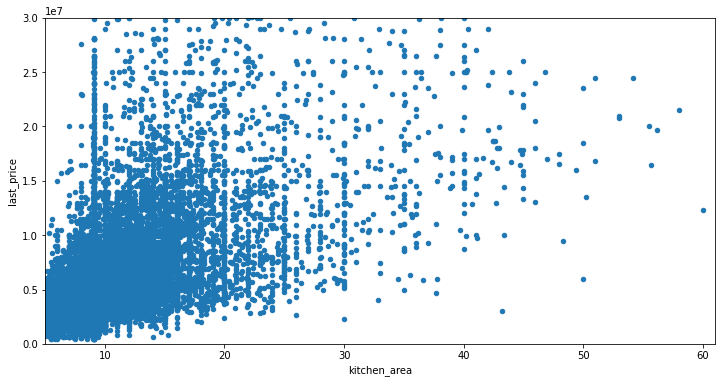

In [104]:
# зависимость цены от площади кухни
data.sort_values('last_price').plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(12,6),
                                   xlim=(5, 61), ylim=(0, 30000000))

Из графика рассеивания видно, что с увеличением площади кухни, увеличивается и цена. Однако есть и совсем пустые зоны: например, квартиры с площадью кухни более 50 кв. м не стоят меньше 5.000.000.

<AxesSubplot:xlabel='rooms'>

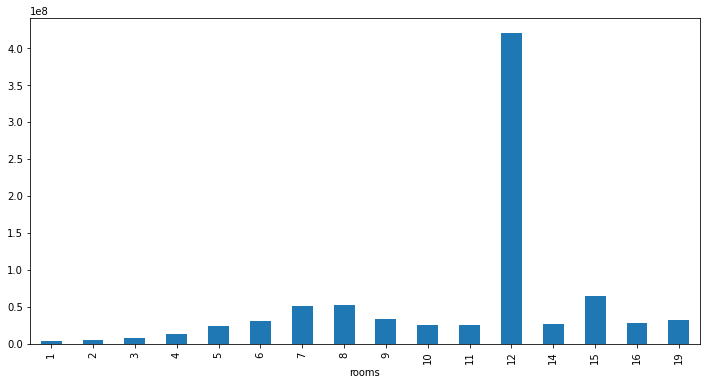

In [105]:
# зависимость цены от количества комнат
data.groupby('rooms')['last_price'].mean().plot(x='rooms', y='last_price', kind='bar', figsize=(12,6))

Из графика видно, что при числе комнат до 8, цена увеличивается пропорционально увеличению числа комнат, однако затем наблюдается обратная пропорциональность при числе комнат от 9 до 11 (цена, наоборот, уменьшается при увеличении числа комнат). Максимальное значение цены в 400.000.000 наблюдается при числе комнат 12, а при числе комнат более 12 также есть тенденция к прямой пропорциональности между ценой и числом комнат.

<AxesSubplot:xlabel='apartment_floor_type'>

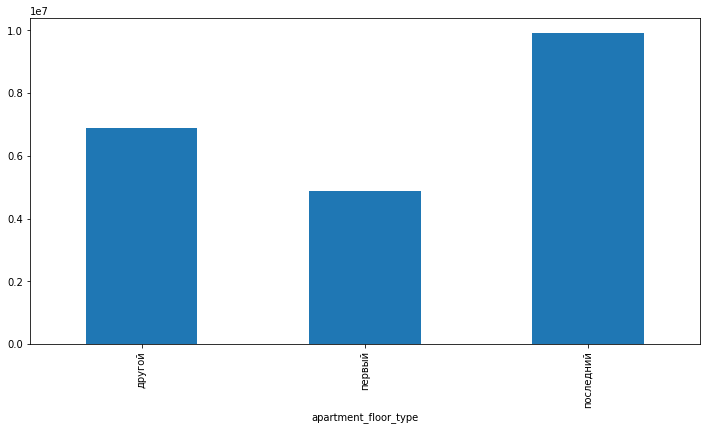

In [106]:
# зависимость цены от этажа, на котором расположена квартира (первый, последний, другой);
data.groupby('apartment_floor_type')['last_price'].mean().plot(x='apartment_floor_type', y='last_price', kind='bar', 
                                                               figsize=(12,6))

Из графика видно, что последний этаж самый дорогой, а первый этаж самый дешевый.

<AxesSubplot:xlabel='announcement_weekday'>

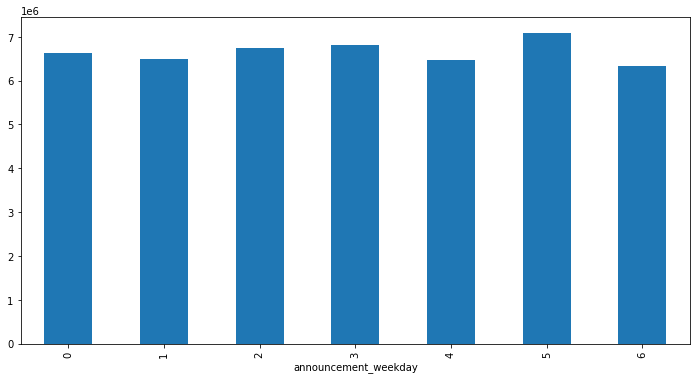

In [107]:
# зависимость цены от даты размещения (день недели).
data.groupby('announcement_weekday')['last_price'].mean().plot(x='announcement_weekday', y='last_price', kind='bar', 
                                                               figsize=(12,6))

Из графика не видно, чтобы была зависимость цены объекта от дня недели, в котором было размещено объявление.

<AxesSubplot:xlabel='publication_month'>

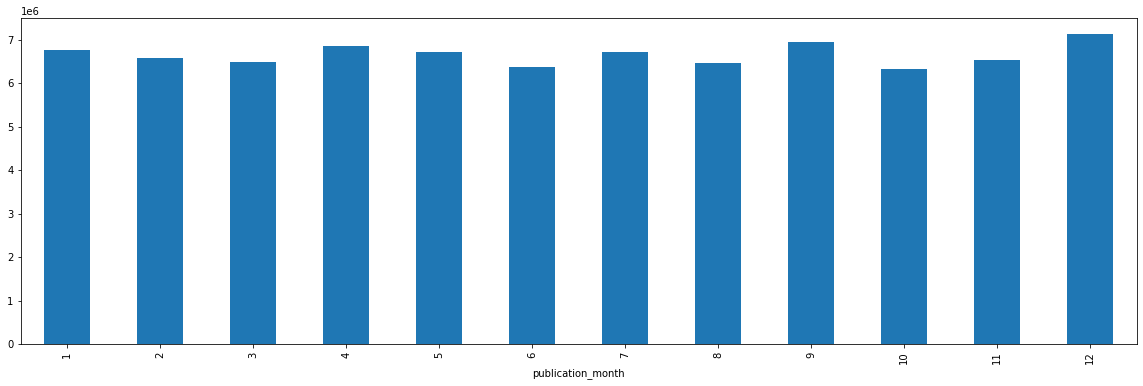

In [108]:
# зависимость цены от даты размещения (месяц).
data.groupby('publication_month')['last_price'].mean().plot(x='publication_month', y='last_price', kind='bar', figsize=(20,6))

Из графика не видно, чтобы была зависимость цены объекта от месяца, в котором было размещено объявление. При этом максимальные цены были в декабре.

<AxesSubplot:xlabel='publication_year'>

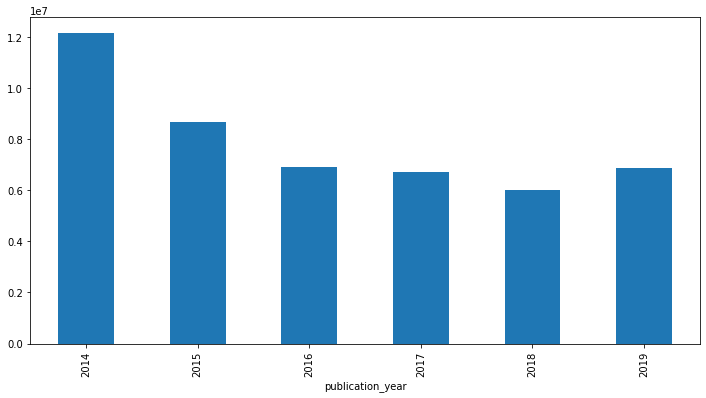

In [109]:
# зависимость цены от даты размещения (год).
data.groupby('publication_year')['last_price'].mean().plot(x='publication_year', y='last_price', kind='bar', figsize=(12,6))

Из графика видно, что максимальные цены были в 2014 году и дальше с каждым последующим годом до 2019 есть тенденция к снижению стоимости квартир.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
   
   Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
   Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [110]:
settlements = data.pivot_table(index='locality_name', values=['first_day_exposition', 'price_per_one_square_meter'], aggfunc=['count', 'mean']).sort_values(by=('count', 'first_day_exposition')).tail(10)
settlements

count                             \
                first_day_exposition price_per_one_square_meter   
locality_name                                                     
выборг                           221                        221   
гатчина                          280                        280   
 кудрово                         281                        281   
 парголово                       322                        322   
колпино                          329                        329   
пушкин                           340                        340   
всеволожск                       387                        387   
 шушары                          427                        427   
 мурино                          517                        517   
санкт-петербург                15360                      15360   

                                      mean  
                price_per_one_square_meter  
locality_name                               
выборг                        58302.774795  
гатчина                       69193.071248  
 кудрово                      92245.259582  
 парголово                    90193.074066  
колпино                       75490.657514  
пушкин                       103964.229346  
всеволожск                    68763.080131  
 шушары                       78395.195415  
 мурино                       84687.101001  
санкт-петербург              114799.688800

In [111]:
data.pivot_table(index='locality_name', values='price_per_one_square_meter').sort_values(by='price_per_one_square_meter')

,price_per_one_square_meter
locality_name,
старополье,11206.221198
станции свирь,11481.481481
вахнова кара,11688.311688
выскатка,12335.480902
совхозный,12629.129129
...,...
сестрорецк,101842.970887
пушкин,103964.229346
репино,104238.614786


Населённый пункт с самой низкой стоимостью квадратного метра - деревня старополье: 11206.  
Населённый пункт с самой высокой стоимостью квадратного метра - зеленогорск: 116185.

#### Как стоимость объектов зависит от расстояния до центра города.

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [112]:
sp_mean = (
    data.query('locality_name == "санкт-петербург"')
    .groupby('distance_to_city_center')['last_price'].mean()
)
sp_mean

distance_to_city_center
0.0     3.144912e+07
1.0     2.145941e+07
2.0     1.800190e+07
3.0     1.121190e+07
4.0     1.343989e+07
5.0     1.467829e+07
6.0     1.545121e+07
7.0     1.496003e+07
8.0     1.007639e+07
9.0     7.057744e+06
10.0    6.580395e+06
11.0    6.290936e+06
12.0    5.885255e+06
13.0    6.534777e+06
14.0    5.670952e+06
15.0    5.918764e+06
16.0    5.410473e+06
17.0    5.351567e+06
18.0    5.116755e+06
19.0    5.059640e+06
20.0    6.097430e+06
21.0    5.515375e+06
22.0    5.431336e+06
23.0    5.051061e+06
24.0    3.917382e+06
25.0    4.069405e+06
26.0    4.108072e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64

In [113]:
sp_mean.median()

6008096.912627856

<AxesSubplot:xlabel='distance_to_city_center'>

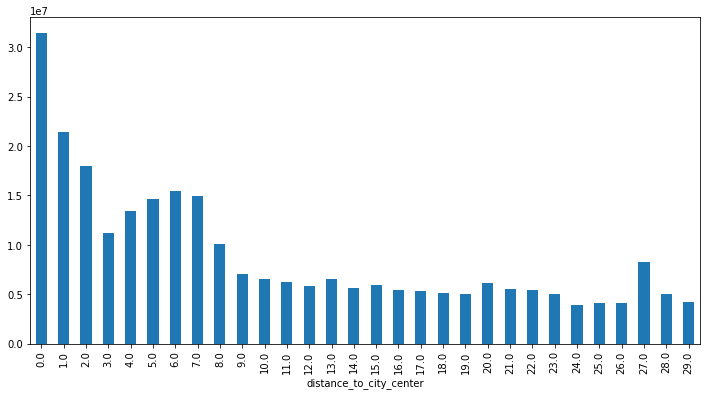

In [114]:
sp_mean.plot(x='distance_to_city_center', y='last_price', kind='bar', figsize=(12,6))

В Санкт-Петербурге при минимальном расстоянии до центра (0-2 км) города цена максимальная (15.000.000-30.000.000). По мере отдаления от центра города, цена уменьшается.

### Общий вывод

Из исследования данных можно сделать следующие выводы:  

    • В среднем объявления (от публикации до снятия) были размещены 98 дней.  
    • Средняя высота потолков – 2.7 м.  
    • Средний показатель — это двухкомнатные квартиры.  
    • Среднее значение общей площади объектов – 61 м2.  
    • Средняя стоимость объектов – 6.642.311.  
    • Среднее значение площади кухни – 10 м2.  
    • С увеличением общей, жилой и кухонной площади квартир, увеличивается и цена. Однако есть и совсем пустые зоны: например, квартиры с жилой площадью более 120 кв. м не стоят меньше 10.000.000; квартиры с площадью кухни более 50 кв. м не стоят меньше 5.000.000.  
    • При числе комнат до 8, цена увеличивается пропорционально увеличению числа комнат, однако затем наблюдается обратная пропорциональность при числе комнат от 9 до 11 (цена, наоборот, уменьшается при увеличении числа комнат). Максимальное значение цены в 400.000.000 наблюдается при числе комнат 12, а при числе комнат более 12 также есть тенденция к прямой пропорциональности между ценой и числом комнат.  
    • Последний этаж самый дорогой, а первый этаж самый дешевый.  
    • Не видно, чтобы была зависимость цены объекта от дня недели, в котором было размещено объявление.  
    • Не видно, чтобы была зависимость цены объекта от месяца, в котором было размещено объявление. При этом максимальные цены были в декабре.  
    • Максимальные цены были в 2014 году и дальше с каждым последующим годом до 2019 есть тенденция к снижению стоимости квартир.  
    • Населённый пункт с самой низкой стоимостью квадратного метра - деревня Старополье: 11206. Населённый пункт с самой высокой стоимостью квадратного метра - Зеленогорск: 116185.  
    • В Санкт-Петербурге при минимальном расстоянии до центра (0-2 км) города цена максимальная (15.000.000-30.000.000). По мере отдаления от центра города, цена уменьшается.  

Рекомендации заказчику: 1) при сборе данных обратить внимание на несбалансированность данных в категориях и увеличить выборку количества объектов в тех, где есть выбросы; 2) обратить внимание на объекты со следующими параметрами: двухкомнатные квартиры, с высотой потолков в среднем 2.7 м, средней общей площадью 61 м2, средней стоимостью в 6.642.311 и средней площадью кухни – 10 м2.; 3) обратить внимание на то, что с увеличением общей, жилой и кухонной площади квартир, увеличивается и цена; 4) обратить внимание на сегмент с 12-комнатными квартирами на последнем этаже в центре города, где цена наиболее резко выделяется в большую сторону.